# <span style='background :#93B7BE' >&#9935; &#9923;<u> Data mining final project knn k analisis</u> </span>
#### <span style='background :#F1FFFA' ><u>Author's:</u> <font color=#454545>   Belochitsky Oleg , Alfi Tal , Friza Ziv</font></span>
#### <span style='background :#F1FFFA' ><u>IDs:</u><font color=#454545>   321192577, 204557052, 312196355</font></span>

### &#10133;  <font color=#785964> Imports:</font>   

In [1]:
import pandas as pd
import numpy as np
import math

# matplotlib is for basic plotting.

import matplotlib
import matplotlib.pyplot as plt

# Seaborn is for statistical visualization.

import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

### <font color=#785964> Loading datasets:</font>  

In [2]:
knn_k = pd.read_csv('test_log/knn_k_test.csv')

for this expirement we run all classifyers on test and train with same conditions 
all expirement done when:
   * train is 80% of train and test is 20% of train
   * all missing values are dealt by removing the row

The only change will be in k.
Testing on k-NN.

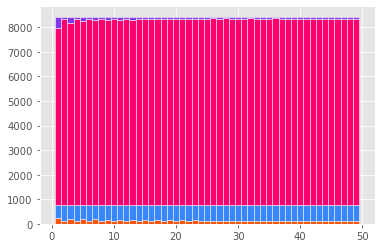

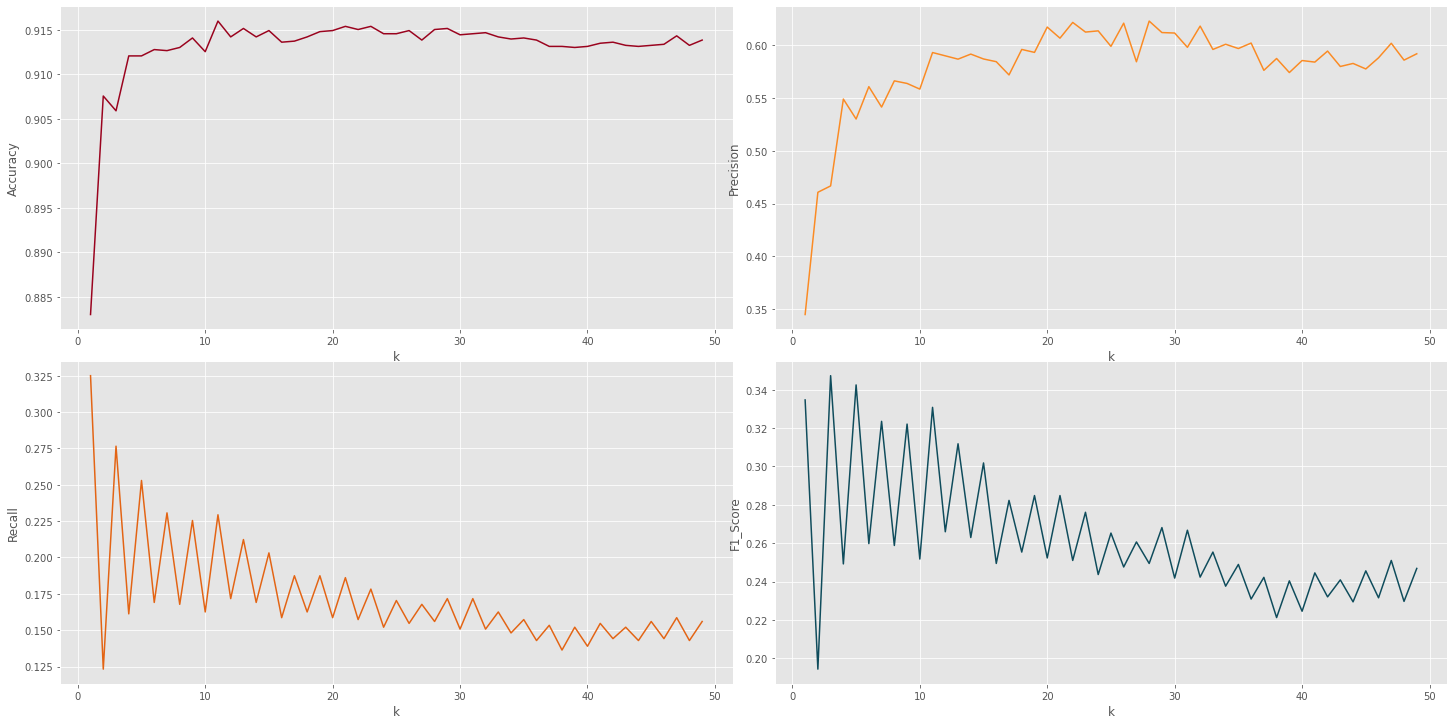

In [5]:
def plot_all_scores_in_row(data, function):
    data = data.copy()
    ### calculating the scores for the plot: ###
    all_k = tuple(data['k'].unique())
    for k in all_k:
        tp = data.loc[data['k']==k,'TP']
        tn = data.loc[data['k']==k,'TN']
        fp = data.loc[data['k']==k,'FP']
        fn = data.loc[data['k']==k,'FN']
        # Accuracy = TP+TN/TP+FP+FN+TN
        data.loc[data['k']==k,'Accuracy'] = (tp + tn) / ( tp + fp + fn + tn )
        # Precision = TP/TP+FP
        data.loc[data['k']==k,'Precision'] = tp / ( tp + fp )
        # Recall = TP/TP+FN
        data.loc[data['k']==k,'Recall']  = tp / ( tp + fn )
        # F1_Score = 2*(Recall * Precision) / (Recall + Precision)
        data.loc[data['k']==k,'F1_Score'] =  2 * (data.loc[data['k']==k,'Recall']  * data.loc[data['k']==k,'Precision']) /\
                                    (data.loc[data['k']==k,'Recall']  + data.loc[data['k']==k,'Precision'])
    ####### ploting the data ###### 
    fig, ax1 = plt.subplots()
    fig,((ax2,ax3),(ax4,ax5))  = plt.subplots(2,2,figsize=(20,10)) 
    axes = (ax1,ax2,ax3,ax4,ax5)

    # matrix #######################
    columns = ['TP','FP','TN','FN']
    values = data[columns]
    bars1 = values['TP'].to_list()
    bars2 = values['FN'].to_list()
    bars3 = values['TN'].to_list()
    bars4 = values['FP'].to_list()

    # Heights of bars1 + bars2
    bars_h1 = np.add(bars1, bars2).tolist()
    bars_h2 = np.add(bars_h1, bars3).tolist()

    # The position of the bars on the x-axis
    r = data['k'].to_list()

    # bar width
    barWidth = 1

    # Create brown bars
    axes[0].bar(r,data['TP'], color='#fb5607', edgecolor='white', width=barWidth, label='TP')
    # Create green bars (middle1), on top of the second ones
    axes[0].bar(r, data['FN'] , bottom=bars1, color='#3a86ff', edgecolor='white', width=barWidth, label='FN')
    # Create green bars (middle2), on top of the two first
    axes[0].bar(r, data['TN'] , bottom=bars_h1, color='#ff006e', edgecolor='white', width=barWidth, label='TN')
    # Create green bars (top)
    axes[0].bar(r, data['FP'] , bottom=bars_h2, color='#8338ec',  edgecolor='white' , width=barWidth, label='FP')
    # Custom X axis

    fig.tight_layout()
    ################################
    ### plting Accuracy,Precision,Recall,F1_Score #######
    colors = ('#9a031e', '#fb8b24', '#e36414', '#0f4c5c')
    for i,col in enumerate(['Accuracy','Precision','Recall','F1_Score']):
        sns.lineplot(x="k", y=col, data=data, ax = axes[i+1], color=colors[i])  
    ################################
    plt.show()
    

plot_all_scores_in_row(knn_k,'k-NN')

conclusion:
around k=5 the f1 score is at it max, we can see that it has negative trend with multiplicative seasonality